In [1]:
import requests
import matplotlib.pyplot as plt
import configparser as cp
import datetime as dt
import pandas as pd
import numpy as np
import random
import os
import io

In [2]:
query = ("SELECT count() AS count, sum(USDVALUE) AS sum, max(USDVALUE) AS max "
        +"FROM liqui "
        +"WHERE timestamp > now() - 3600000000L;")

In [3]:
r = requests.get("http://213.136.85.153:9000/exp?query="+query)

In [19]:
#r = requests.get("http://213.136.85.153:9000/exp?query="+query)
r = requests.get("http://213.136.85.153:9000/exp?query=select * from liqui")
rawData = r.text
df = pd.read_csv(io.StringIO(rawData), parse_dates=['timestamp'], index_col='timestamp')

In [20]:
last = df[df.index == df.index[-1]]

In [33]:
last = df.last('1H')

In [37]:
last.USDVALUE.sum()

1511596.22407

In [9]:
df['USD'] = df.QUANTITY * df.PRICE

In [13]:
df.USDVALUE.max()

998725.0

In [11]:
sum(df.USD)

1853944092.145942

<AxesSubplot:xlabel='timestamp'>

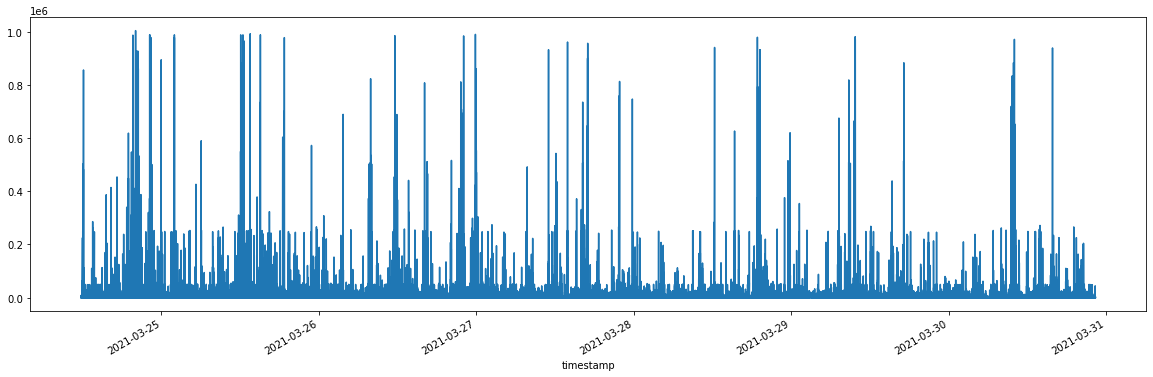

In [14]:
df.USD.plot(figsize=(20,6))